In [1]:
# !pip install plot_keras_history
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from plot_keras_history import show_history

## Getting the data

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [3]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


## Run a simple model to check if Keras is working properly

In [4]:
# let's try a basic neural network for digit classification
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

c:\Users\Admin\OneDrive - smail.iitm.ac.in\Stdy\Sem 10\CS5830 Big Data Lab\A05_MLFlow\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6058 - loss: 1.4965 - val_accuracy: 0.8874 - val_loss: 0.4483
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8962 - loss: 0.3958 - val_accuracy: 0.9170 - val_loss: 0.2879
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9222 - loss: 0.2726 - val_accuracy: 0.9289 - val_loss: 0.2423


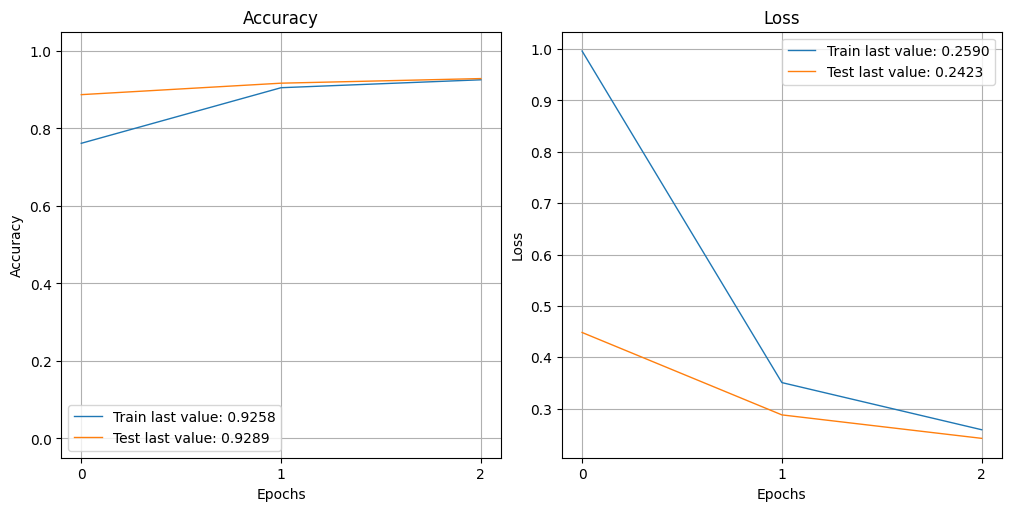

In [6]:
show_history(history)

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9289 - loss: 0.2423
Test accuracy: 92.89%
1875/1875 - 5s - 3ms/step - accuracy: 0.9331 - loss: 0.2315
Train accuracy: 93.31%


In [8]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted Digit: 3


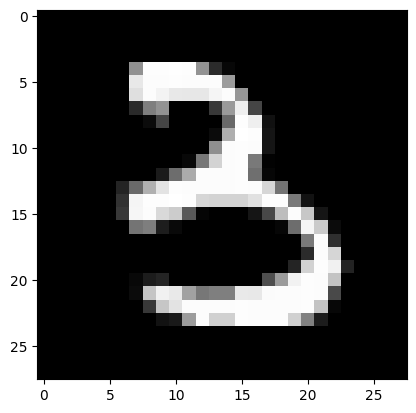

In [9]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

# Define all the experiment variants

In [56]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py


class define_expt_variants:
    """
    Class which holds all the 10 required experimental variants
    Each variant differs by a minor configuation such as learning rates, model size, batch size etc.
    """
    def __init__(self):
        pass

    def cfg_basic(self):
        """basic neural network for digit classification"""
        model_1 = keras.Sequential()
        model_1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_1.add(layers.Dense(20, activation='sigmoid'))
        model_1.add(layers.Dense(10, activation='softmax'))

        model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_1
    
    def cfg_bigger(self):
        """bigger model"""
        model_2 = keras.Sequential()
        model_2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_2.add(layers.Dense(128, activation='sigmoid'))
        model_2.add(layers.Dense(10, activation='softmax'))

        model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_2
    
    def cfg_regularised(self):
        """regularised model"""
        model_3 = keras.Sequential()
        model_3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(10, activation='softmax'))

        model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_3.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

        return model_3
    
    def cfg_dropout(self):
        """model with dropout"""
        model_4 = keras.Sequential()
        model_4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_4.add(Dropout(0.7))
        model_4.add(layers.Dense(128, activation='sigmoid'))
        model_4.add(Dropout(0.6))
        model_4.add(layers.Dense(10, activation='softmax'))

        model_4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_4.fit(x_train, y_train, epochs=10)

        return model_4
    
    def cfg_early_stop(self):
        """model with early stopping callback"""
        model_5 = keras.Sequential()
        model_5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_5.add(layers.Dense(128, activation='sigmoid'))
        model_5.add(layers.Dense(10, activation='softmax'))
        model_5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
        # model_ will get saved at the end of every epoch automatically.
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        history = model_5.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])
        
        return model_5
    

    def cfg_lr_10(self):
        """model with a very high learning rate"""
        model_6 = keras.Sequential()
        model_6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_6.add(layers.Dense(10, activation='sigmoid'))
        model_6.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=10)
        model_6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_6.fit(x_train, y_train, epochs=20)

        return model_6
    
    def cfg_lr_1e_5(self):
        """model with very low learning rate"""
        model_7 = keras.Sequential()
        model_7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_7.add(layers.Dense(10, activation='sigmoid'))
        model_7.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=.00001)
        model_7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_7.fit(x_train, y_train, epochs=20)

        return model_7
    
    def cfg_lr_1e_2(self):
        """model with optimal learning rate"""
        model_8 = keras.Sequential()
        model_8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_8.add(layers.Dense(10, activation='sigmoid'))
        model_8.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01)
        model_8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_8.fit(x_train, y_train, epochs=20)

        return model_8
    
    def cfg_lr_momentum(self):
        """model with momentum in the optimizer"""
        model_9 = keras.Sequential()
        model_9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_9.add(layers.Dense(10, activation='sigmoid'))
        model_9.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_9.fit(x_train, y_train, epochs=20)

        return model_9
    
    def cfg_minibatch_sgd(self):
        """Mini-batch SGD - the default minibatch size is 32 unlike 1"""
        model_10 = keras.Sequential()
        model_10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_10.add(layers.Dense(10, activation='sigmoid'))
        model_10.add(layers.Dense(10, activation='softmax'))
        
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_10.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_10.fit(x_train, y_train, batch_size=512, epochs=10)

        return model_10


In [41]:
expts = define_expt_variants()
model_t= expts.cfg_basic()

c:\Users\Admin\OneDrive - smail.iitm.ac.in\Stdy\Sem 10\CS5830 Big Data Lab\A05_MLFlow\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024/04/21 07:44:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0947626921794646b504fbfe2a295d76', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5903 - loss: 1.5448

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5904 - loss: 1.5445 - val_accuracy: 0.8920 - val_loss: 0.4374
Epoch 2/2
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8986 - loss: 0.3867

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8986 - loss: 0.3866 - val_accuracy: 0.9216 - val_loss: 0.2799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


# Use MLflow experiments
Run the command `mlflow server` in the terminal if you get a Connection Refused Error

In [13]:
import mlflow
from mlflow.tracking import MlflowClient

# Set the tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Run the command `mlflow server` in the terminal if you get a connection refused error

# Start the parent experiment
parent_experiment = mlflow.set_experiment("A05 MNIST Experiment")

In [58]:
# we let the run_name to be randomly chosen, so that a new 
# entry is created as the parent experiment (a new row is created with each run of the cell)
# all children experiments are nested
with mlflow.start_run(experiment_id=parent_experiment.experiment_id, 
                    #   run_name="MNIST Parent Run"
                      ):

    # Create an instance of the ModelConfigurations class
    model_configs = define_expt_variants()

    # Get the list of configuration methods from the class
    config_methods = [getattr(model_configs, method_name) for method_name in dir(model_configs) if callable(getattr(model_configs, method_name)) and method_name.startswith('cfg')]

    config_methods = config_methods[:2]


    # Code for running the 10 model configurations
    # for config_num in range(1, 3):
    for i, config_method in enumerate(config_methods, start=1):

        with mlflow.start_run(run_name=f"MNIST Config {config_method.__name__}", nested=True):

            # hopefully logs network params also??
            mlflow.autolog()
            
            # the method is defined such that it fits the model on the data
            model = config_method()

            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
            train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)

            # Assemble the metrics we're going to write into a collection
            metrics = {"test_loss": test_loss, 
                       "test_acc": test_acc, 
                       "train_loss": train_loss, 
                       "train_acc": train_acc
                       }
            
            # Log the error metrics that were calculated during validation
            mlflow.log_metrics(metrics)

            print(f'metrics are {metrics}')

            
            # Assemble a few parameters manually to try 
            params = {
              'lr_mlflow_param_custom': model.optimizer.learning_rate.numpy(),
              'momentum_mlflow_param_custom': model.optimizer.momentum, 
              'optimiser_param_custom': model.optimizer.__class__.__name__
            } 
            mlflow.log_params(params)
            
            print(f'params are {params}')


            
            # Code for running the specific model configuration
            # ...
            # Log metrics, parameters, and artifacts for the model configuration
            # mlflow.log_metric("accuracy", 1)
            # mlflow.log_param("learning_rate", learning_rate)
            # mlflow.log_param("batch_size", batch_size)
            # # ...
            # mlflow.log_artifact("model.pkl")


methds = [<bound method define_expt_variants.cfg_basic of <__main__.define_expt_variants object at 0x000001E929DD05D0>>, <bound method define_expt_variants.cfg_bigger of <__main__.define_expt_variants object at 0x000001E929DD05D0>>]


2024/04/21 08:02:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/21 08:02:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/2
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6239 - loss: 1.4935

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6245 - loss: 1.4916 - val_accuracy: 0.8857 - val_loss: 0.4422
Epoch 2/2
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8943 - loss: 0.3999

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8944 - loss: 0.3998 - val_accuracy: 0.9220 - val_loss: 0.2915


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
313/313 - 1s - 3ms/step - accuracy: 0.9220 - loss: 0.2915
1875/1875 - 6s - 3ms/step - accuracy: 0.9188 - loss: 0.2924
metrics are {'test_loss': 0.29152220487594604, 'test_acc': 0.921999990940094, 'train_loss': 0.2924036681652069, 'train_acc': 0.9187833070755005}
metrics are {'test_loss': 0.29152220487594604, 'test_acc': 0.921999990940094, 'train_loss': 0.2924036681652069, 'train_acc': 0.9187833070755005}


2024/04/21 08:03:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/04/21 08:03:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Epoch 1/2
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8043 - loss: 0.7170

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8047 - loss: 0.7156 - val_accuracy: 0.9402 - val_loss: 0.2008
Epoch 2/2
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9423 - loss: 0.1919

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9423 - loss: 0.1918 - val_accuracy: 0.9542 - val_loss: 0.1458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
313/313 - 2s - 6ms/step - accuracy: 0.9542 - loss: 0.1458
1875/1875 - 8s - 4ms/step - accuracy: 0.9576 - loss: 0.1380
metrics are {'test_loss': 0.1458451896905899, 'test_acc': 0.954200029373169, 'train_loss': 0.13797596096992493, 'train_acc': 0.9575833082199097}
metrics are {'test_loss': 0.1458451896905899, 'test_acc': 0.954200029373169, 'train_loss': 0.13797596096992493, 'train_acc': 0.9575833082199097}


In [ ]:

# Get the experiment ID of the parent experiment
experiment_id = parent_experiment.experiment_id

# Get the MlflowClient
client = MlflowClient()

# Get the parent run information
parent_run = client.get_run(parent_experiment.run_id)

# Print the parent run information
print(f"Parent Run Name: {parent_run.data.tags.get('mlflow.runName')}")
print(f"Parent Run ID: {parent_run.info.run_id}")

# Get the child runs for the parent run
child_runs = client.search_runs(experiment_id=experiment_id, filter_string=f"tags.mlflow.parentRunId = '{parent_run.info.run_id}'")

# Print the child run information
for child_run in child_runs:
    print(f"Child Run Name: {child_run.data.tags.get('mlflow.runName')}")
    print(f"Child Run ID: {child_run.info.run_id}")

In [ ]:
# Let's try with a slightly bigger model with more parameters.
model2 = keras.Sequential()
model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(128, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0949 - accuracy: 0.9718 - val_loss: 0.0935 - val_accuracy: 0.9713
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0759 - accuracy: 0.9775 - val_loss: 0.0911 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.0824 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0758 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0756 - val_a

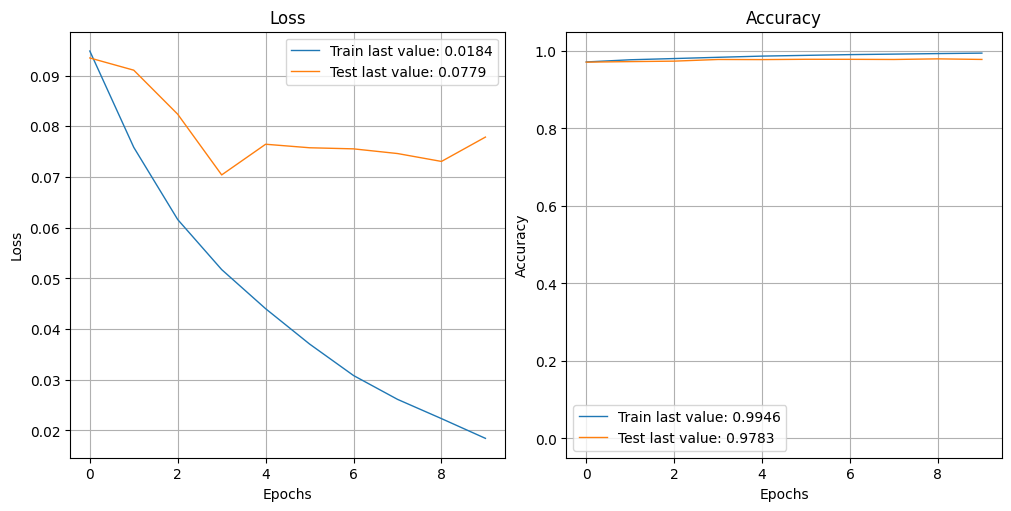

In [ ]:
show_history(history)

In [ ]:
loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model2.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0779 - accuracy: 0.9783 - 1s/epoch - 4ms/step
Test accuracy: 97.83%
1875/1875 - 4s - loss: 0.0135 - accuracy: 0.9960 - 4s/epoch - 2ms/step
Train accuracy: 99.60%


In [ ]:
# let's try adding kernel regularization to the mix.
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_r = model_r.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

Epoch 1/50
50/50 [==============================] - 4s 64ms/step - loss: 1.3834 - accuracy: 0.7579 - val_loss: 1.3292 - val_accuracy: 0.7909
Epoch 2/50
50/50 [==============================] - 2s 46ms/step - loss: 1.3662 - accuracy: 0.7634 - val_loss: 1.3128 - val_accuracy: 0.7945
Epoch 3/50
50/50 [==============================] - 4s 76ms/step - loss: 1.3487 - accuracy: 0.7688 - val_loss: 1.3355 - val_accuracy: 0.7839
Epoch 4/50
50/50 [==============================] - 3s 57ms/step - loss: 1.3406 - accuracy: 0.7685 - val_loss: 1.3044 - val_accuracy: 0.7667
Epoch 5/50
50/50 [==============================] - 2s 46ms/step - loss: 1.3287 - accuracy: 0.7714 - val_loss: 1.3021 - val_accuracy: 0.7638
Epoch 6/50
50/50 [==============================] - 3s 58ms/step - loss: 1.3227 - accuracy: 0.7684 - val_loss: 1.2942 - val_accuracy: 0.7865
Epoch 7/50
50/50 [==============================] - 3s 56ms/step - loss: 1.3165 - accuracy: 0.7693 - val_loss: 1.3329 - val_accuracy: 0.7529
Epoch 8/50
50

In [ ]:
loss, acc = model_r.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_r.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 1.1330 - accuracy: 0.7870 - 644ms/epoch - 2ms/step
Test accuracy: 78.70%
1875/1875 - 4s - loss: 1.1545 - accuracy: 0.7784 - 4s/epoch - 2ms/step
Train accuracy: 77.84%


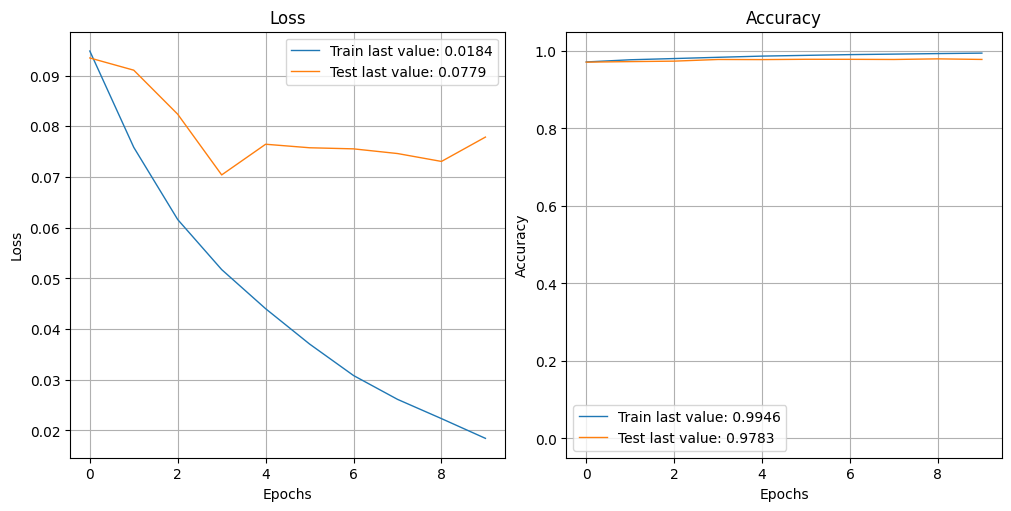

In [ ]:
show_history(history_r)

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model_rd = keras.Sequential()
model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))
model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))
model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_rd = model_rd.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8542 - accuracy: 0.7215
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4486 - accuracy: 0.8691
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3883 - accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3501 - accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3267 - accuracy: 0.9103
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3109 - accuracy: 0.9157
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2951 - accuracy: 0.9208
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2880 - accuracy: 0.9237
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2763 - accuracy: 0.9264
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

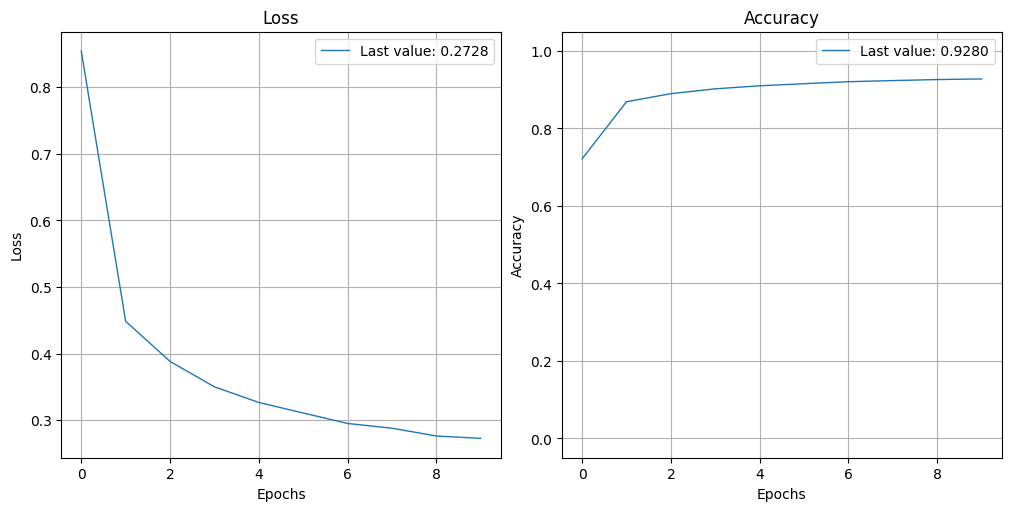

In [ ]:
show_history(history_rd)

In [ ]:
loss, acc = model_rd.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_rd.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1548 - accuracy: 0.9569 - 767ms/epoch - 2ms/step
Test accuracy: 95.69%
1875/1875 - 4s - loss: 0.1449 - accuracy: 0.9606 - 4s/epoch - 2ms/step
Train accuracy: 96.06%


In [ ]:
# EARLY STOPPING METHOD
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

In [ ]:
# model will get saved at the end of every epoch automatically.
checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
history_es = model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3995 - accuracy: 0.8874 - val_loss: 0.1976 - val_accuracy: 0.9408
Epoch 2/10
  25/1875 [..............................] - ETA: 8s - loss: 0.2172 - accuracy: 0.9275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1711 - accuracy: 0.9480 - val_loss: 0.1398 - val_accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1175 - accuracy: 0.9648 - val_loss: 0.1037 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0901 - val_accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0820 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0728 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0756 - val_accuracy: 0.97

In [ ]:
show_history(history_es)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.1013 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.1038 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.1121 - val_accuracy: 0.9745


In [ ]:
# Using LEarning rates now.
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                15700     
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt_new = keras.optimizers.SGD(learning_rate=10)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4196 - accuracy: 0.5569
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9477 - accuracy: 0.7383
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7737 - accuracy: 0.7938
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6970 - accuracy: 0.8140
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.8511
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.8315
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6072 - accuracy: 0.8466
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - accuracy: 0.8441
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.8235
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.639

In [ ]:
# too low learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                15700     
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4651 - accuracy: 0.1124
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4618 - accuracy: 0.1123
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4586 - accuracy: 0.1123
Epoch 4

In [ ]:
# optimal learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                15700     
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2533 - accuracy: 0.2392
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0421 - accuracy: 0.4538
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7108 - accuracy: 0.5248
Epoch 4

In [ ]:
# optimal learning rate with momentum
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                15700     
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1416 - accuracy: 0.3215
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5759 - accuracy: 0.5187
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1739 - accuracy: 0.6662
Epoch 4

In [ ]:
# Mini-batch SGD
# the default minibatch size is 32 unlike 1.
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(10, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, batch_size=512, epochs=10)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                15700     
                                                                 
 dense_61 (Dense)            (None, 10)                210       
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 2.1100 - accuracy: 0.3083
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 1.7772 - accuracy: 0.5403
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 1.5238 - accuracy: 0.5899
Epoch 4/10
11